### Importing The Audio Dataset

In [1]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           4353        100  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          11004        236  0.9411765        
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           2959         42  1.0              
abdullah0a/retail-sales-data-with-seasonal-trends-and-m

In [8]:
!kaggle datasets download -d kenjee/z-by-hp-unlocked-challenge-3-signal-processing

Dataset URL: https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing
License(s): CC-BY-NC-SA-4.0
100% 601M/604M [00:22<00:00, 27.6MB/s]
100% 604M/604M [00:22<00:00, 28.6MB/s]


In [9]:
!unzip /content/z-by-hp-unlocked-challenge-3-signal-processing.zip

Archive:  /content/z-by-hp-unlocked-challenge-3-signal-processing.zip
  inflating: Forest Recordings/recording_00.mp3  
  inflating: Forest Recordings/recording_01.mp3  
  inflating: Forest Recordings/recording_02.mp3  
  inflating: Forest Recordings/recording_03.mp3  
  inflating: Forest Recordings/recording_04.mp3  
  inflating: Forest Recordings/recording_05.mp3  
  inflating: Forest Recordings/recording_06.mp3  
  inflating: Forest Recordings/recording_07.mp3  
  inflating: Forest Recordings/recording_08.mp3  
  inflating: Forest Recordings/recording_09.mp3  
  inflating: Forest Recordings/recording_10.mp3  
  inflating: Forest Recordings/recording_11.mp3  
  inflating: Forest Recordings/recording_12.mp3  
  inflating: Forest Recordings/recording_13.mp3  
  inflating: Forest Recordings/recording_14.mp3  
  inflating: Forest Recordings/recording_15.mp3  
  inflating: Forest Recordings/recording_16.mp3  
  inflating: Forest Recordings/recording_17.mp3  
  inflating: Forest Recordings

### Defining Paths To Files

In [10]:
import os
CAPUCHIN_BIRD = os.path.join('/content' , 'Parsed_Capuchinbird_Clips' , 'XC114131-0.wav')
NOT_CAPUCHIN_BIRD = os.path.join('/content' , 'Parsed_Not_Capuchinbird_Clips' ,'Crickets-chirping-0.wav')

In [11]:
print(CAPUCHIN_BIRD)
print(NOT_CAPUCHIN_BIRD)

/content/Parsed_Capuchinbird_Clips/XC114131-0.wav
/content/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-0.wav


### Numerical Encodding

In [12]:
import librosa

In [13]:
def audio_encode(file_path):
  signal , sample_rate = librosa.load(file_path , sr=22050)
  return signal

In [14]:
capuchin_bird_audio_data = audio_encode(CAPUCHIN_BIRD)
not_capuchin_bird_audio_data = audio_encode(NOT_CAPUCHIN_BIRD)

### Plotting The Audio Signal

In [15]:
from matplotlib.pyplot import gcf

In [16]:
from matplotlib import pyplot as plt
import librosa.display

def plot_audio(audio_data):
  librosa.display.waveshow(audio_data , sr=22050)
  plt.title('Audio Signal')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  f = plt.gcf()
  f.set_size_inches(6 , 2)
  plt.show()

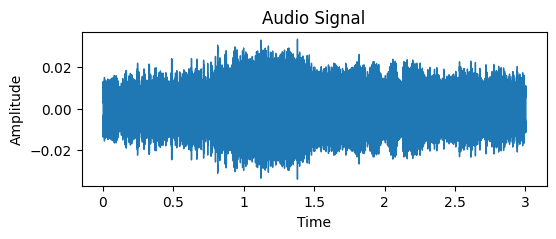

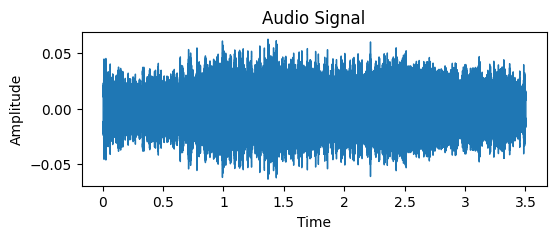

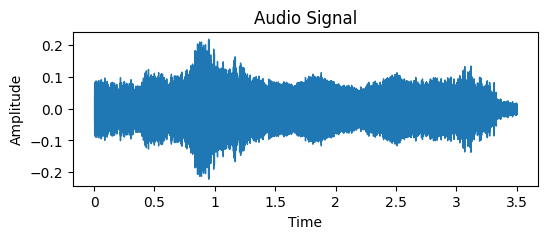

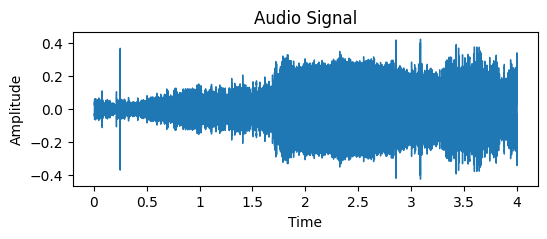

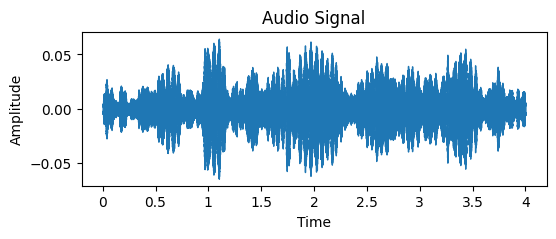

In [17]:
count = 0
for filename in os.listdir('Parsed_Capuchinbird_Clips'):
  file_path = os.path.join('Parsed_Capuchinbird_Clips' , filename)
  signal = audio_encode(file_path)
  plot_audio(signal)
  count = count + 1
  if count == 5:
    break

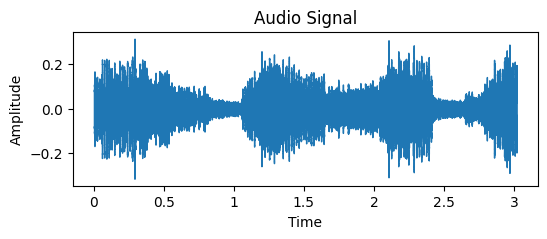

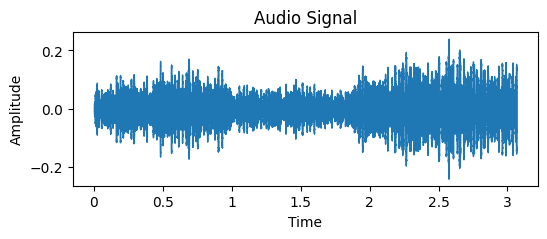

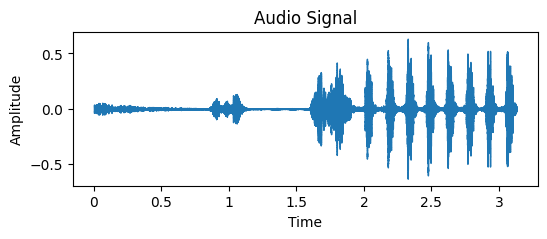

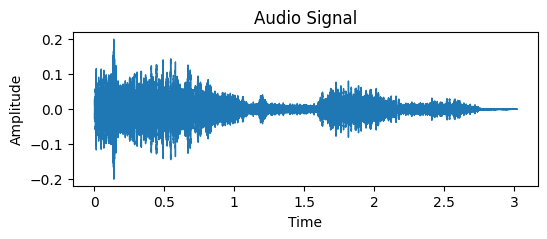

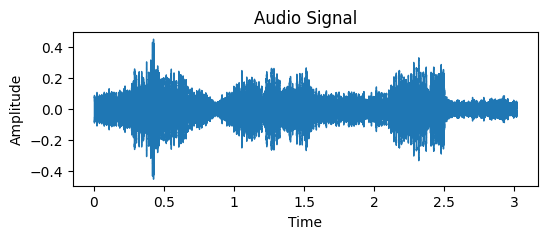

In [18]:
count = 0
for filename in os.listdir('Parsed_Not_Capuchinbird_Clips'):
  file_path = os.path.join('Parsed_Not_Capuchinbird_Clips' , filename)
  signal = audio_encode(file_path)
  plot_audio(signal)
  count = count + 1
  if count == 5:
    break

### Feature Extraction From Audio Data (from numerical encoding)

In [19]:
def mfcc_feature_extract(audio_data):
  mfccs = librosa.feature.mfcc(y=audio_data , sr=22050 , n_mfcc=40)
  return mfccs

In [20]:
def plot_mfcc(mfccs):
  librosa.display.specshow(mfccs , sr=22050 , x_axis='time')
  plt.title('MFCC')
  f = plt.gcf()
  f.set_size_inches(5, 3.5)
  plt.colorbar()
  plt.show()

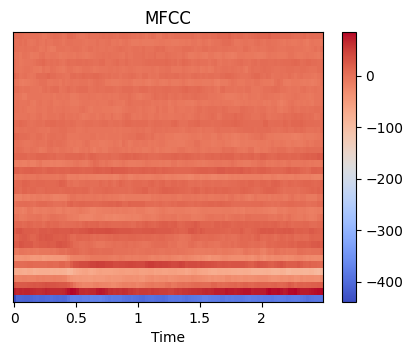

In [21]:
plot_mfcc(mfcc_feature_extract(audio_encode(CAPUCHIN_BIRD)))

In [22]:
mfcc = mfcc_feature_extract(audio_encode(CAPUCHIN_BIRD))
print(mfcc.shape)

(40, 108)


### Encoding The Entire Dataset

In [33]:
import numpy as np

In [34]:
dataset = []

In [35]:
for filename in os.listdir('Parsed_Not_Capuchinbird_Clips'):
  file_path = os.path.join('Parsed_Not_Capuchinbird_Clips' , filename)
  # print(f"Processing audio file : {file_path}")
  signal = audio_encode(file_path)
  mfccs = mfcc_feature_extract(signal)
  dataset.append([mfccs , 0])

In [36]:
for filename in os.listdir('Parsed_Capuchinbird_Clips'):
  file_path = os.path.join('Parsed_Capuchinbird_Clips' , filename)
  # print(f"Processing audio file : {file_path}")
  signal = audio_encode(file_path)
  mfccs = mfcc_feature_extract(signal)
  dataset.append([mfccs , 1])

In [37]:
for i in dataset:
  print("mfcc : " , i[0].shape ," label : " , i[1])

mfcc :  (40, 131)  label :  0
mfcc :  (40, 133)  label :  0
mfcc :  (40, 135)  label :  0
mfcc :  (40, 131)  label :  0
mfcc :  (40, 131)  label :  0
mfcc :  (40, 132)  label :  0
mfcc :  (40, 134)  label :  0
mfcc :  (40, 130)  label :  0
mfcc :  (40, 132)  label :  0
mfcc :  (40, 130)  label :  0
mfcc :  (40, 130)  label :  0
mfcc :  (40, 132)  label :  0
mfcc :  (40, 130)  label :  0
mfcc :  (40, 133)  label :  0
mfcc :  (40, 132)  label :  0
mfcc :  (40, 133)  label :  0
mfcc :  (40, 133)  label :  0
mfcc :  (40, 133)  label :  0
mfcc :  (40, 137)  label :  0
mfcc :  (40, 133)  label :  0
mfcc :  (40, 133)  label :  0
mfcc :  (40, 130)  label :  0
mfcc :  (40, 130)  label :  0
mfcc :  (40, 131)  label :  0
mfcc :  (40, 133)  label :  0
mfcc :  (40, 131)  label :  0
mfcc :  (40, 131)  label :  0
mfcc :  (40, 132)  label :  0
mfcc :  (40, 131)  label :  0
mfcc :  (40, 141)  label :  0
mfcc :  (40, 132)  label :  0
mfcc :  (40, 131)  label :  0
mfcc :  (40, 130)  label :  0
mfcc :  (4

### Zero Padding (to make sure all mfcc's have same dimensions)

In [38]:
max_len = 0
for mfcc, label in dataset:
  if mfcc.shape[1] > max_len:
    max_len = mfcc.shape[1]

In [39]:
for i in range(len(dataset)):
  mfcc = dataset[i][0]
  pad_width = max_len - mfcc.shape[1]
  padded_mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  dataset[i][0] = padded_mfcc

In [42]:
dataset = [tuple(item) for item in dataset]

dataset = np.array(dataset, dtype=object)

In [47]:
np.random.shuffle(dataset)

In [48]:
for i in dataset:
  print("mfcc : " , i[0].shape ," label : " , i[1])

mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  1
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  1
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  1
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  1
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (40, 216)  label :  0
mfcc :  (4

In [49]:
x = []
y = []
for mfcc, label in dataset:
  x.append(mfcc)
  y.append(label)

x = np.array(x)
y = np.array(y)

In [50]:
x.shape , y.shape

((810, 40, 216), (810,))

### Splitting The Test and Train Sets

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , shuffle=True)

In [53]:
print(len(x_train) , len(x_test))
print(len(y_train) , len(y_test))

648 162
648 162


### Creating An Artificial Neural Network

In [118]:
import tensorflow as tf

In [119]:
print("Single Data Will Look like")
print(x[0].shape)

Single Data Will Look like
(40, 216)


In [144]:
ann_classifier = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x.shape[1], x.shape[2])),
tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [145]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001)

In [146]:
ann_classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [147]:
ann_classifier.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 8640)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │         553,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 555,137 (2.12 MB)

 Trainable params: 555,137 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

### Training The Network

In [148]:
history = ann_classifier.fit(x_train, y_train, epochs=70, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7567 - loss: 8.0484 - val_accuracy: 0.7654 - val_loss: 6.4235
Epoch 2/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7410 - loss: 7.4706 - val_accuracy: 0.7716 - val_loss: 5.4621
Epoch 3/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7509 - loss: 7.1386 - val_accuracy: 0.7901 - val_loss: 4.6113
Epoch 4/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7568 - loss: 5.9583 - val_accuracy: 0.7901 - val_loss: 3.9418
Epoch 5/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7713 - loss: 4.8766 - val_accuracy: 0.8148 - val_loss: 3.4689
Epoch 6/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7670 - loss: 4.0658 - val_accuracy: 0.8086 - val_loss: 3.0256
Epoch 7/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7654 - loss: 3.5841 - val_accuracy: 0.8395 - val_loss: 2.6796
Epoch 8/70
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7495 - loss: 3.3052 - val_accuracy: 0.8395 - va

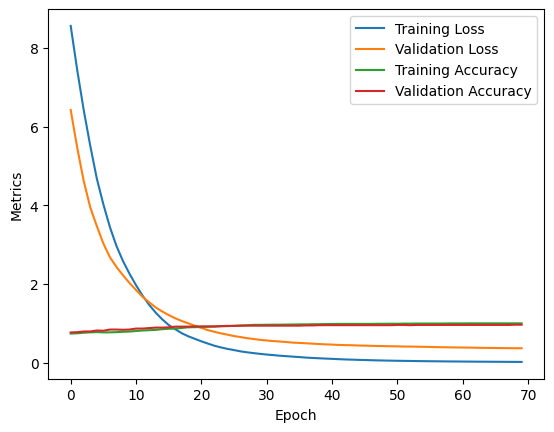

In [149]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()

### Prediction

In [150]:
predictions = ann_classifier.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [152]:
predictions = np.round(predictions).flatten()

In [153]:
predictions

array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [154]:
print(len(predictions) , len(y_test))

162 162


In [157]:
for i in range(len(predictions)):
  print(f"Predicted : {predictions[i]} , Actual : {y_test[i]}")

Predicted : 1.0 , Actual : 1
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 1.0 , Actual : 1
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 1.0 , Actual : 1
Predicted : 0.0 , Actual : 0
Predicted : 1.0 , Actual : 1
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 1.0 , Actual : 1
Predicted : 0.0 , Actual : 1
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 1.0 , Actual : 1
Predicted : 1.0 , Actual : 1
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 1.0 , Actual : 1
Predicted : 0.0 , Actual : 0
Predicted : 0.0 , Actual : 0
Predicted : 1.0 , Actual : 1
Predicted : 0.0 , Actual : 0
Predicted : 1.0 , Actual : 1
Predicted : 0.

### Inference On the Forest Audio

In [158]:
!pip install pydub==0.25.1

In [159]:
forest_audio_sample = os.path.join('/content' , 'Forest Recordings' , 'recording_00.mp3')
forest_audio_sample

'/content/Forest Recordings/recording_00.mp3'

#### Split Audio Into Clips

In [161]:
!mkdir clips

In [197]:
from pydub import AudioSegment
audio = AudioSegment.from_mp3(forest_audio_sample)

In [233]:
for i, chunk in enumerate(audio[::5000]):
  with open("/content/clips/chunk{0}.wav".format(i), "wb") as f:
    chunk.export(f, format="wav")

#### Prediction On Each Clip

In [234]:
audio_clip = '/content/clips'

In [235]:
directory = audio_clip

file_count = sum(os.path.isfile(os.path.join(directory, f)) for f in os.listdir(directory))

print(f"Number of files: {file_count}")

Number of files: 181


In [236]:
predictions = []

In [237]:
for i in range(0 , file_count):
  file_path = os.path.join(audio_clip , f"chunk{i}.wav")
  signal = audio_encode(file_path)
  mfccs = mfcc_feature_extract(signal)
  pad_width = max_len - mfccs.shape[1]
  padded_mfcc = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
  padded_mfcc = np.expand_dims(padded_mfcc, axis=0)
  print(f"Classifier running on {file_path}")
  prediction = ann_classifier.predict(padded_mfcc)
  prediction = np.round(prediction).flatten()
  predictions.append(prediction)

Classifier running on /content/clips/chunk0.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classifier running on /content/clips/chunk1.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Classifier running on /content/clips/chunk2.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classifier running on /content/clips/chunk3.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classifier running on /content/clips/chunk4.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classifier running on /content/clips/chunk5.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classifier running on /content/clips/chunk6.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classifier running on /content/clips/chunk7.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classifier running on /content/clips/chunk8.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classifier running on /content/clips/chunk9.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classifier running on /content/clips/chunk10.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classifier running on /content/clips/chunk11.wav
1/1 

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=927
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classifier running on /content/clips/chunk38.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Classifier running on /content/clips/chunk39.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Classifier running on /content/clips/chunk40.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classifier running on /content/clips/chunk41.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classifier running on /content/clips/chunk42.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classifier running on /content/clips/chunk43.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Classifier running on /content/clips/chunk44.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classifier running on /content/clips/chunk45.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classifier running on /content/clips/chunk46.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classifier running on /content/clips/chunk47.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Classifier running on /content/clips/chunk48.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Class